In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
twitter_data = pd.read_excel('/content/drive/MyDrive/Text Analytics group project/Twitter_Reviews.xlsx')

In [ ]:
import nltk
from nltk.probability import FreqDist
nltk.download('all')

##Data Preprocessing

In [ ]:
twitter_data.columns

Index(['Unnamed: 0', 'Company_Name', 'Rating', 'Date', 'Pros', 'Cons'], dtype='object')

In [ ]:
pattern = r"\d+\xa0people found this review helpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"Be the first to find this review helpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"Be the first to find this review helpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"\d+\xa0person found this review helpfulHelpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
pattern = r"\d+\xa0people found this review helpfulHelpful.*"
twitter_data["Cons"] = twitter_data["Cons"].replace(pattern, "", regex=True)

In [ ]:
twitter_data['Pros'] = twitter_data['Pros'].apply(str)
twitter_data['Cons'] = twitter_data['Cons'].apply(str)

In [ ]:
twitter_data['Date'] = pd.to_datetime(twitter_data['Date'])
twitter_data = twitter_data[twitter_data['Date'].dt.year > 2015]

In [ ]:
twitter_data['Cons'] = twitter_data['Cons'].str.lower()
twitter_data['Pros'] = twitter_data['Pros'].str.lower()

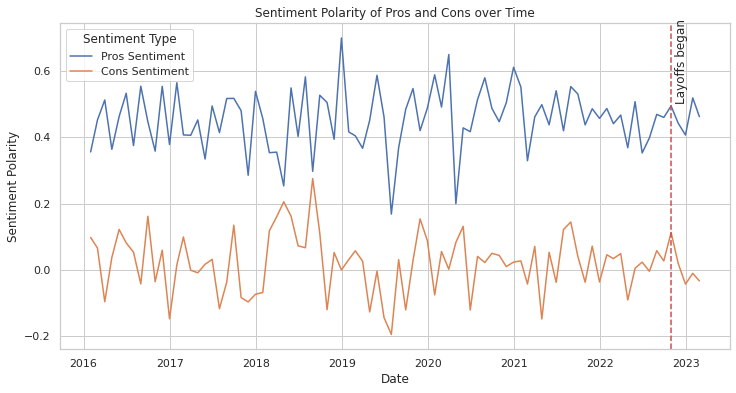

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
twitter_data['Pros Sentiment'] = twitter_data['Pros'].apply(lambda x: TextBlob(x).sentiment.polarity)
twitter_data['Cons Sentiment'] = twitter_data['Cons'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_monthly = twitter_data.resample('M', on='Date').mean().reset_index()

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(twitter_data, id_vars=['Company_Name', 'Rating', 'Date'], value_vars=['Pros Sentiment', 'Cons Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(df_monthly, id_vars=['Date'], value_vars=['Pros Sentiment', 'Cons Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment polarity over time
sns.set(style='whitegrid')
sns.lineplot(data=df_melted, x='Date', y='Sentiment Polarity', hue='Sentiment Type')

# Add vertical line for layoffs
plt.axvline(pd.Timestamp('2022-11-01'), color='r', linestyle='--')
plt.text(pd.Timestamp('2022-11-15'), 0.5, 'Layoffs began', rotation=90, verticalalignment='bottom')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Sentiment Polarity of Pros and Cons over Time')

# Show the plot
plt.show()

In [ ]:
twitter_data["Review"] =   twitter_data['Pros'] + "." + twitter_data['Cons']

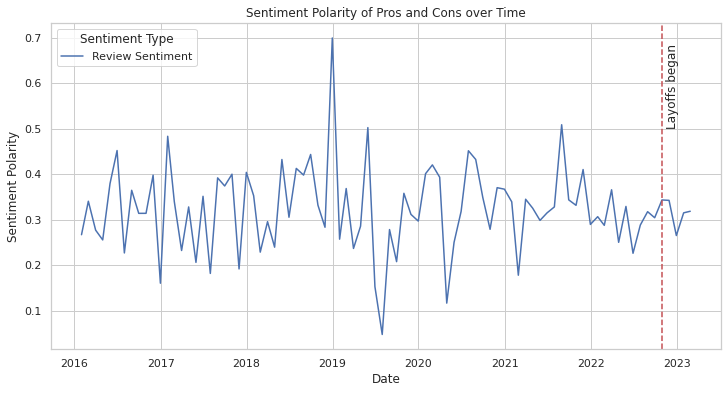

In [ ]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
twitter_data['Review Sentiment'] = twitter_data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_monthly = twitter_data.resample('M', on='Date').mean().reset_index()

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(twitter_data, id_vars=['Company_Name', 'Rating', 'Date'], value_vars=['Review Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Melt the dataframe to plot the sentiment polarity
df_melted = pd.melt(df_monthly, id_vars=['Date'], value_vars=['Review Sentiment'],
                    var_name='Sentiment Type', value_name='Sentiment Polarity')

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment polarity over time
sns.set(style='whitegrid')
sns.lineplot(data=df_melted, x='Date', y='Sentiment Polarity', hue='Sentiment Type')

# Add vertical line for layoffs
plt.axvline(pd.Timestamp('2022-11-01'), color='r', linestyle='--')
plt.text(pd.Timestamp('2022-11-15'), 0.5, 'Layoffs began', rotation=90, verticalalignment='bottom')

# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sentiment Polarity')

# Set the title of the plot
plt.title('Sentiment Polarity of Pros and Cons over Time')

# Show the plot
plt.show()

In [ ]:
from textblob import TextBlob

def get_positive_words(text):
    """
    Returns a list of positive words and phrases from the given text.
    """
    # Create a TextBlob object for the text
    blob = TextBlob(text)
    
    # Get the list of words and phrases
    words = blob.words + blob.noun_phrases
    
    # Initialize a flag to track negation
    negation = False
    
    # Initialize an empty list to store positive words and phrases
    positive_words = []
    
    # Loop through each word in the text
    for word in words:
        # If the word is a negation word, set the negation flag
        if word in ["not", "n't", "never"]:
            negation = True
        
        # If the word is not a negation word and has positive polarity, add it to the list of positive words
        elif TextBlob(word).sentiment.polarity > 0:
            # If the negation flag is set, flip the polarity of the word and add it to the list of positive words
            if negation:
                positive_words.append("not " + word)
                negation = False
            else:
                positive_words.append(word)
        
        # If the word is not a negation word and has negative polarity, reset the negation flag
        elif TextBlob(word).sentiment.polarity < 0:
            negation = False
    
    return positive_words

In [ ]:
positive_words = twitter_data["Pros"].apply(get_positive_words)

In [ ]:
flat_list = [word for sublist in positive_words for word in sublist]

In [ ]:
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'great': 597, 'good': 358, 'amazing': 127, 'very': 107, 'nice': 102, 'smart': 100, 'free': 67, 'really': 65, 'great culture': 63, 'interesting': 60, 'best': 59, 'fun': 57, 'great benefits': 55, 'friendly': 44, 'great people': 43, 'most': 41, 'awesome': 39, 'great place': 34, 'new': 34, 'smart people': 31, 'love': 31, 'talented': 30, 'many': 29, 'strong': 28, 'supportive': 27, 'free food': 26, 'good culture': 24, 'good benefits': 24, 'great perks': 23, 'nice people': 23, 'excellent': 22, 'more': 22, 'cool': 21, 'kind': 21, 'fantastic': 21, 'high': 20, 'fast': 20, 'challenging': 20, 'good work life balance': 20, 'easy': 19, 'great company': 19, 'decent': 18, 'first': 18, 'exciting': 16, 'pretty': 15, 'super': 15, 'incredible': 15, 'huge': 15, 'good perks': 15, 'positive': 14, 'full': 14, 'good place': 14, 'loved': 13, 'much': 13, 'intelligent': 13, 'interesting problems': 13, 'top': 13, 'highly': 12, 'genuinely': 12, 'great food': 12, 'amazing place': 11, 'great team': 11, 'amazing peop

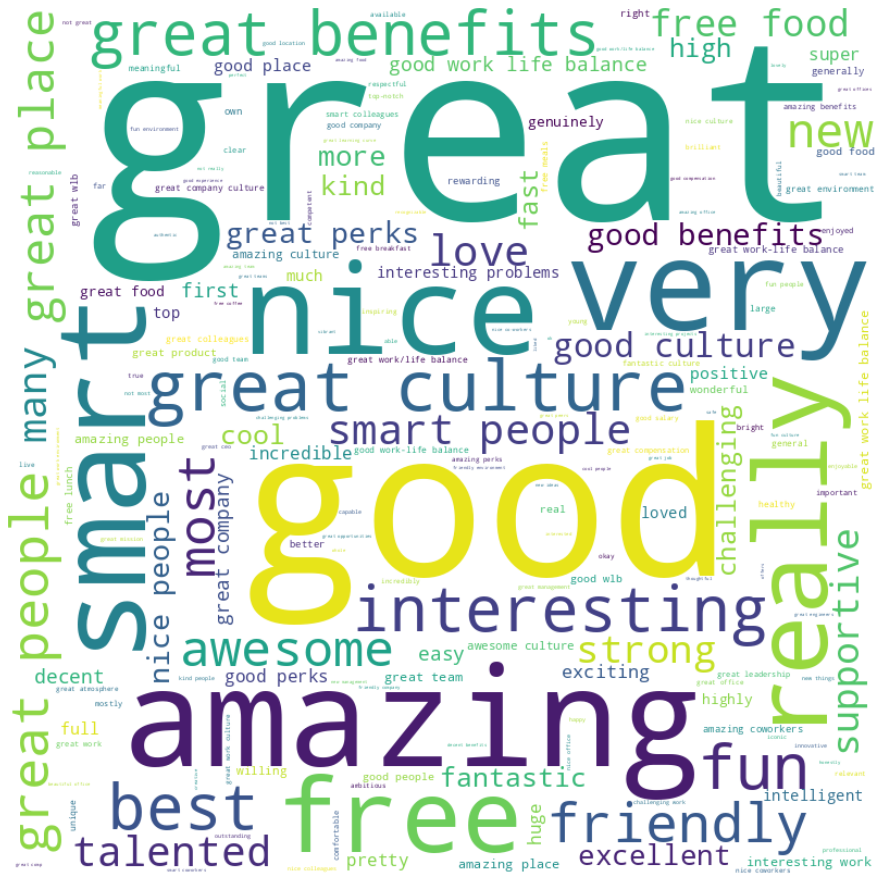

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from textblob import TextBlob

def get_negative_words(text):
    """
    Returns a list of negative words and phrases from the given text.
    """
    # Create a TextBlob object for the text
    blob = TextBlob(text)
    
    # Get the list of words and phrases
    words = blob.words + blob.noun_phrases
    
    # Initialize a flag to track negation
    negation = False
    
    # Initialize an empty list to store negative words and phrases
    negative_words = []
    
    # Loop through each word in the text
    for word in words:
        # If the word is a negation word, set the negation flag
        if word in ["not", "n't", "never"]:
            negation = True
        
        # If the word is not a negation word and has negative polarity, add it to the list of negative words
        elif TextBlob(word).sentiment.polarity < 0:
            # If the negation flag is set, flip the polarity of the word and add it to the list of negative words
            if negation:
                negative_words.append("not " + word)
                negation = False
            else:
                negative_words.append(word)
        
        # If the word is not a negation word and has positive polarity, reset the negation flag
        elif TextBlob(word).sentiment.polarity > 0:
            negation = False
    
    return negative_words


In [ ]:
negative_words = twitter_data["Cons"].apply(get_negative_words)

In [ ]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'slow': 65, 'hard': 54, 'other': 50, 'poor': 49, 'bad': 41, 'long': 39, 'little': 36, 'difficult': 27, 'due': 26, 'down': 24, 'limited': 18, 'few': 17, 'terrible': 16, 'extremely': 14, 'less': 14, 'poor leadership': 12, 'weak': 12, 'negative': 11, 'tough': 11, 'small': 10, 'behind': 10, 'long hours': 10, 'slowly': 10, 'unfortunately': 9, 'horrible': 9, 'remote': 9, 'inexperienced': 9, 'past': 8, 'outdated': 7, 'heavy': 7, 'mess': 7, 'worse': 7, 'harder': 7, 'incompetent': 6, 'single': 6, 'impossible': 6, 'unpredictable': 6, 'poor management': 6, 'mean': 6, 'worst': 5, 'poorly': 5, 'slightly': 5, 'crazy': 4, 'wrong': 4, 'complicated': 4, 'not hard': 4, 'mediocre': 4, 'frustrating': 4, 'common': 4, 'not other': 4, 'expensive': 4, 'least': 4, 'late': 4, 'long work hours': 3, 'not down': 3, 'everyday': 3, 'random': 3, 'previous': 3, 'unfair': 3, 'not bad': 3, 'not poor': 3, 'spent': 3, 'fail': 3, 'sad': 3, 'cutting': 3, 'long term vision': 3, 'suffers': 3, 'bad management': 3, 'poor compe

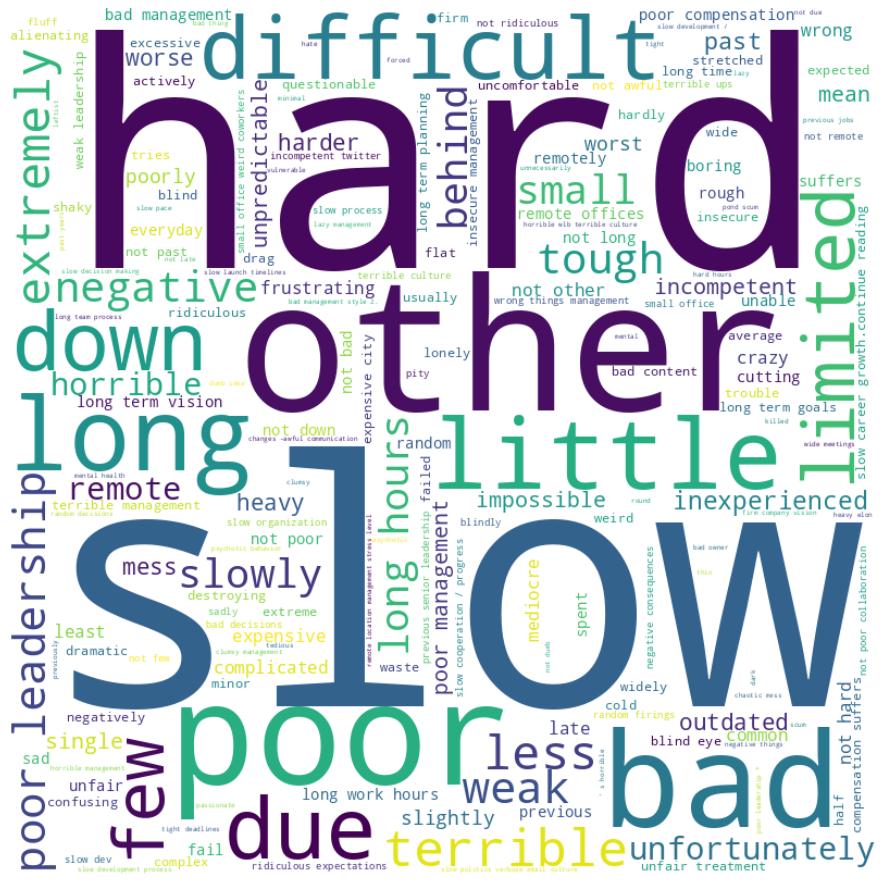

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Filtering pre and post layoffs


In [ ]:
twitter_data["Date"] = pd.to_datetime(twitter_data["Date"])

In [ ]:
twitter_data_post_layoff =   twitter_data[twitter_data["Date"] >= "2022-11-30"]

In [ ]:
twitter_data_pre_layoff =   twitter_data[twitter_data["Date"] <= "2022-11-01"]

In [ ]:
len(twitter_data_pre_layoff)

1039

##Pros (Positive comments) before lay-offs

In [ ]:
positive_words = twitter_data_pre_layoff["Pros"].apply(get_positive_words)

In [ ]:
flat_list = [word for sublist in positive_words for word in sublist]

In [ ]:
from collections import Counter
word_counts = Counter(flat_list)
top_words_pre_layoff_pros = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words_pre_layoff_pros)

{'great': 488, 'good': 291, 'amazing': 97, 'very': 93, 'nice': 87, 'smart': 85, 'free': 63, 'really': 55, 'great culture': 53, 'interesting': 50, 'fun': 48, 'best': 45, 'great benefits': 41, 'friendly': 40, 'great people': 36, 'awesome': 32, 'love': 30, 'most': 30, 'smart people': 27, 'talented': 26, 'many': 26, 'free food': 24, 'new': 23, 'strong': 23, 'great place': 22, 'nice people': 21, 'good benefits': 20, 'great perks': 20, 'cool': 18, 'excellent': 18, 'more': 18, 'easy': 18, 'good culture': 18, 'high': 18, 'good work life balance': 17, 'decent': 16, 'great company': 16, 'kind': 15, 'fast': 15, 'challenging': 15, 'supportive': 15, 'fantastic': 15, 'pretty': 14, 'good perks': 14, 'positive': 13, 'exciting': 13, 'incredible': 13, 'first': 13, 'top': 13, 'huge': 13, 'super': 13, 'full': 12, 'genuinely': 12, 'great food': 12, 'much': 11, 'interesting problems': 10, 'amazing people': 10, 'great work life balance': 10, 'highly': 10, 'good place': 10, 'intelligent': 9, 'interesting work

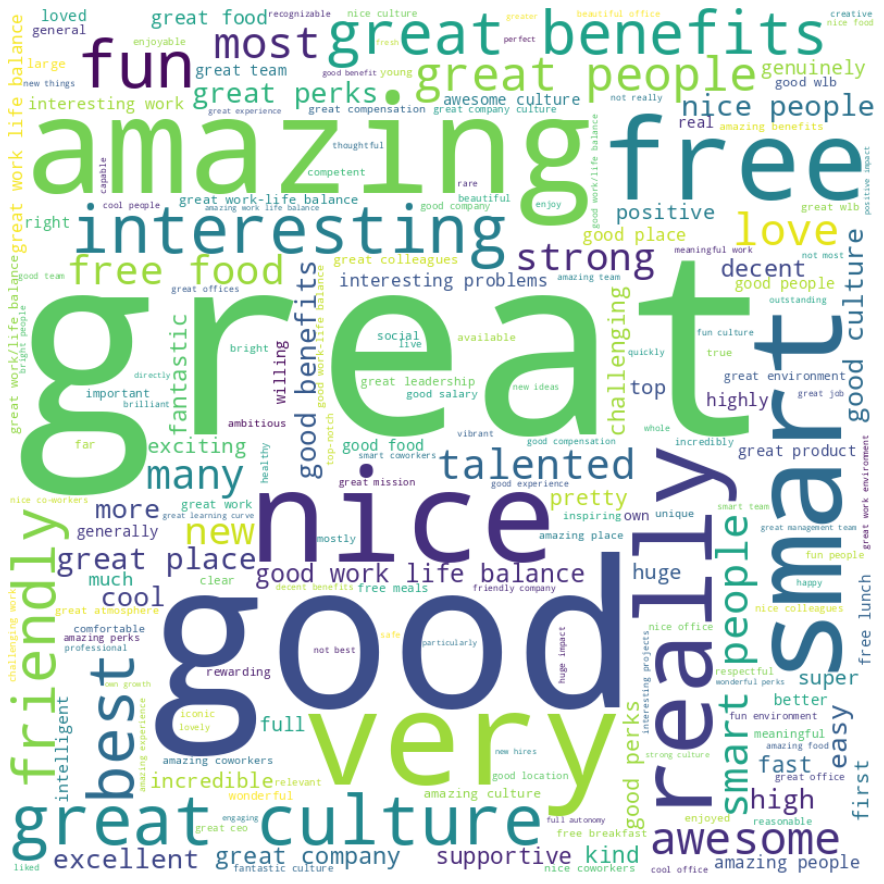

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_pre_layoff_pros)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Negative comments pre lay-*offs*

In [ ]:
negative_words = twitter_data_pre_layoff["Cons"].apply(get_negative_words)

In [ ]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words_pre_layoff_cons = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'slow': 65, 'hard': 54, 'other': 50, 'poor': 49, 'bad': 41, 'long': 39, 'little': 36, 'difficult': 27, 'due': 26, 'down': 24, 'limited': 18, 'few': 17, 'terrible': 16, 'extremely': 14, 'less': 14, 'poor leadership': 12, 'weak': 12, 'negative': 11, 'tough': 11, 'small': 10, 'behind': 10, 'long hours': 10, 'slowly': 10, 'unfortunately': 9, 'horrible': 9, 'remote': 9, 'inexperienced': 9, 'past': 8, 'outdated': 7, 'heavy': 7, 'mess': 7, 'worse': 7, 'harder': 7, 'incompetent': 6, 'single': 6, 'impossible': 6, 'unpredictable': 6, 'poor management': 6, 'mean': 6, 'worst': 5, 'poorly': 5, 'slightly': 5, 'crazy': 4, 'wrong': 4, 'complicated': 4, 'not hard': 4, 'mediocre': 4, 'frustrating': 4, 'common': 4, 'not other': 4, 'expensive': 4, 'least': 4, 'late': 4, 'long work hours': 3, 'not down': 3, 'everyday': 3, 'random': 3, 'previous': 3, 'unfair': 3, 'not bad': 3, 'not poor': 3, 'spent': 3, 'fail': 3, 'sad': 3, 'cutting': 3, 'long term vision': 3, 'suffers': 3, 'bad management': 3, 'poor compe

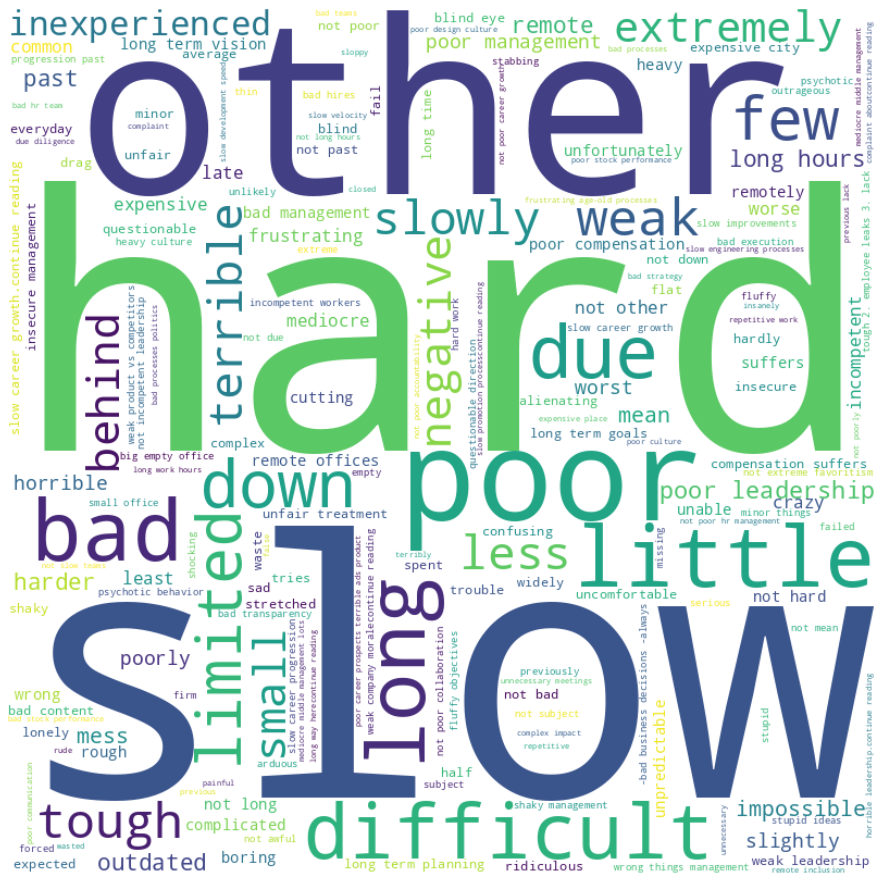

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_pre_layoff_cons)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_pros =" "
for comment in twitter_data_pre_layoff["Pros"]:
    doc1_pros = doc1_pros + str(comment)

Filtering out all the adjectives("JJ")

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('great', 301),
 ('good', 191),
 ('nice', 68),
 ('smart', 59),
 ('free', 47),
 ('best', 34),
 ('flexible', 34),
 ('many', 25),
 ('friendly', 25),
 ('i', 25)]

Filtering out all the superlative adjectives ("JJS")

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJS")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('best', 34),
 ('most', 20),
 ('smartest', 4),
 ('least', 3),
 ('nicest', 2),
 ('opportunitybest', 1),
 ('youbest', 1),
 ('employeesbest', 1),
 ('opportunitiesbest', 1),
 ('worst', 1)]

In [ ]:
doc1_cons =" "
for comment in twitter_data_pre_layoff["Cons"]:
    doc1_cons = doc1_cons + str(comment)

In [ ]:
tokens = nltk.word_tokenize(doc1_cons)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)
top_10_attributes

[('many', 59),
 ('much', 50),
 ('other', 49),
 ('good', 47),
 ('more', 45),
 ('great', 40),
 ('hard', 39),
 ('high', 33),
 ('new', 28),
 ('bad', 28)]

## Post Layoffs


#  Positive comments (Pros) Post Layoffs

In [ ]:
positive_words = twitter_data_post_layoff["Pros"].apply(get_positive_words)

In [ ]:
flat_list = [word for sublist in positive_words for word in sublist]

In [ ]:
from collections import Counter
word_counts = Counter(flat_list)
top_words_post_layoff_pros = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'slow': 65, 'hard': 54, 'other': 50, 'poor': 49, 'bad': 41, 'long': 39, 'little': 36, 'difficult': 27, 'due': 26, 'down': 24, 'limited': 18, 'few': 17, 'terrible': 16, 'extremely': 14, 'less': 14, 'poor leadership': 12, 'weak': 12, 'negative': 11, 'tough': 11, 'small': 10, 'behind': 10, 'long hours': 10, 'slowly': 10, 'unfortunately': 9, 'horrible': 9, 'remote': 9, 'inexperienced': 9, 'past': 8, 'outdated': 7, 'heavy': 7, 'mess': 7, 'worse': 7, 'harder': 7, 'incompetent': 6, 'single': 6, 'impossible': 6, 'unpredictable': 6, 'poor management': 6, 'mean': 6, 'worst': 5, 'poorly': 5, 'slightly': 5, 'crazy': 4, 'wrong': 4, 'complicated': 4, 'not hard': 4, 'mediocre': 4, 'frustrating': 4, 'common': 4, 'not other': 4, 'expensive': 4, 'least': 4, 'late': 4, 'long work hours': 3, 'not down': 3, 'everyday': 3, 'random': 3, 'previous': 3, 'unfair': 3, 'not bad': 3, 'not poor': 3, 'spent': 3, 'fail': 3, 'sad': 3, 'cutting': 3, 'long term vision': 3, 'suffers': 3, 'bad management': 3, 'poor compe

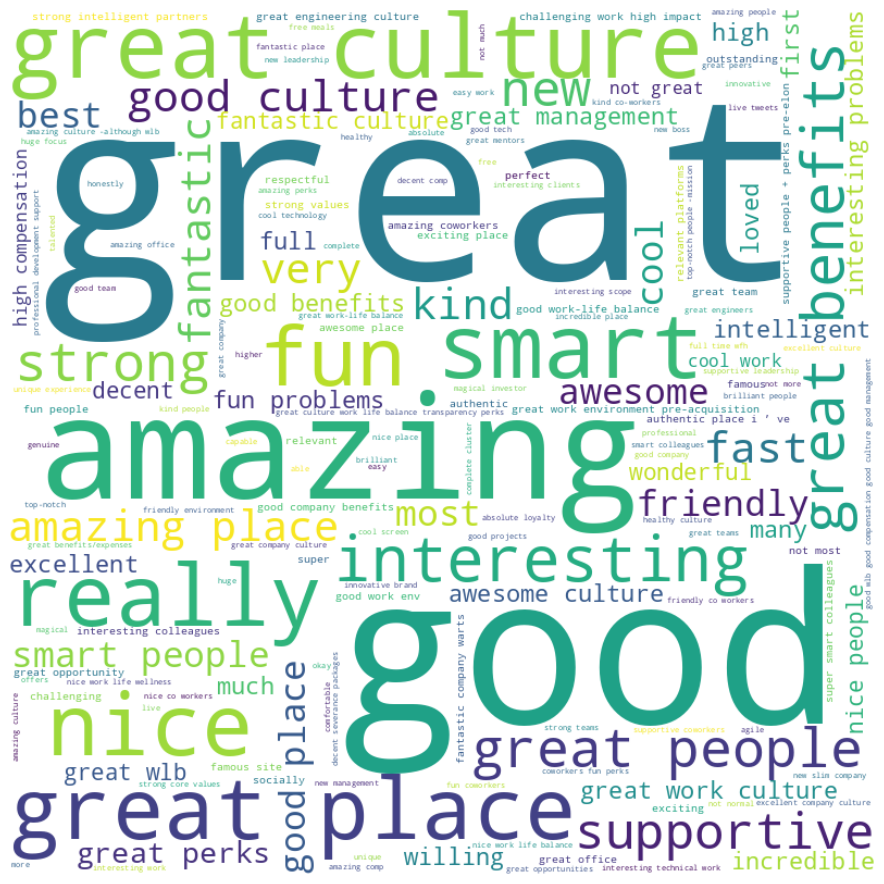

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_post_layoff_pros)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Cons  Negative comments post layoffs

In [ ]:
negative_words = twitter_data_pre_layoff["Cons"].apply(get_negative_words)

In [ ]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words_post_layoff_cons = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words)

{'slow': 48, 'hard': 47, 'other': 47, 'poor': 40, 'little': 33, 'bad': 33, 'long': 30, 'difficult': 27, 'due': 25, 'down': 20, 'limited': 18, 'few': 17, 'weak': 12, 'tough': 11, 'less': 10, 'slowly': 10, 'terrible': 10, 'small': 9, 'behind': 9, 'negative': 9, 'extremely': 9, 'inexperienced': 9, 'poor leadership': 8, 'outdated': 7, 'long hours': 7, 'past': 7, 'remote': 7, 'harder': 7, 'impossible': 6, 'mean': 6, 'mess': 6, 'worst': 5, 'poorly': 5, 'slightly': 5, 'horrible': 5, 'poor management': 5, 'crazy': 4, 'worse': 4, 'incompetent': 4, 'mediocre': 4, 'frustrating': 4, 'common': 4, 'not other': 4, 'expensive': 4, 'least': 4, 'late': 4, 'unfortunately': 3, 'wrong': 3, 'heavy': 3, 'unpredictable': 3, 'cutting': 3, 'long term vision': 3, 'not hard': 3, 'suffers': 3, 'bad management': 3, 'poor compensation': 3, 'not long': 3, 'remotely': 3, 'boring': 3, 'complicated': 3, 'unable': 3, 'rough': 3, 'remote offices': 3, 'stretched': 2, 'hardly': 2, 'everyday': 2, 'minor': 2, 'shaky': 2, 'que

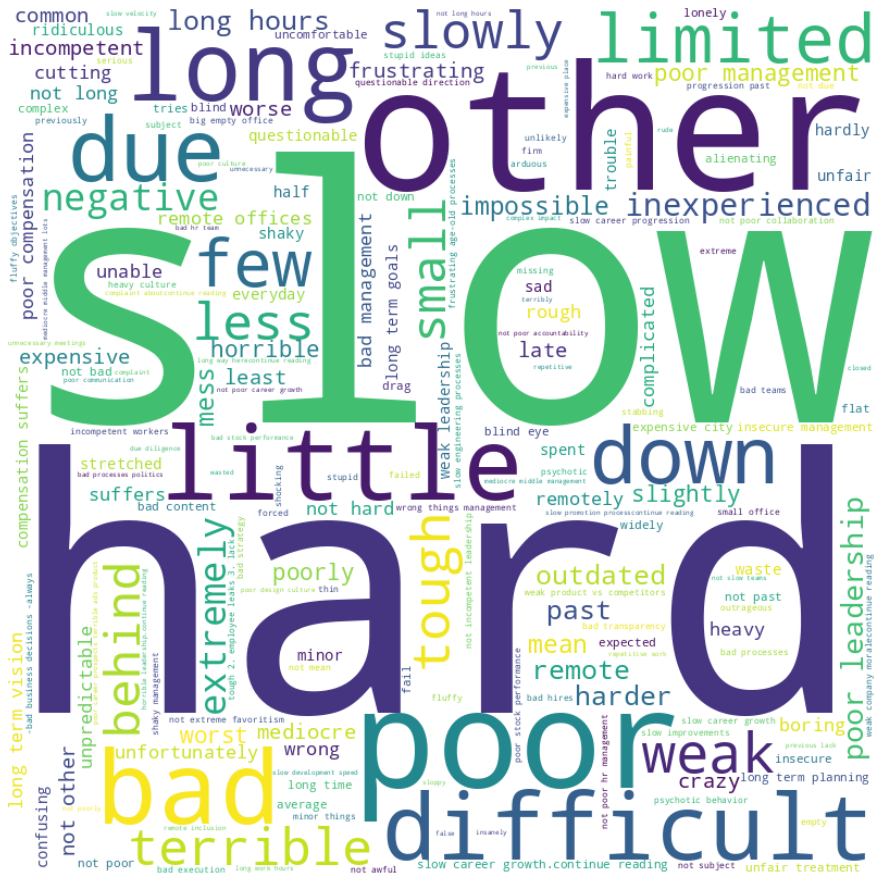

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_post_layoff_cons)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
doc1_pros =" "
for comment in twitter_data_post_layoff["Pros"]:
    doc1_pros = doc1_pros+comment

In [ ]:
tokens = nltk.word_tokenize(doc1_pros)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)
top_10_attributes

[('great', 42),
 ('good', 20),
 ('amazing', 10),
 ('smart', 7),
 ('nice', 7),
 ('supportive', 5),
 ('strong', 4),
 ('work-life', 4),
 ('interesting', 4),
 ('new', 4)]

In [ ]:
doc1_cons =" "
for comment in twitter_data_post_layoff["Cons"]:
    doc1_cons = doc1_cons+str(comment)

In [ ]:
tokens = nltk.word_tokenize(doc1_cons)
tagged_tokens = nltk.pos_tag(tokens)
adjectives = [word for word, pos in tagged_tokens if pos.startswith("JJ")]
fdist = FreqDist(adjectives)
top_10_attributes = fdist.most_common(10)

In [ ]:
top_10_attributes

[('new', 11),
 ('terrible', 6),
 ('different', 6),
 ('slow', 5),
 ('poor', 5),
 ('toxic', 5),
 ('bad', 5),
 ('more', 4),
 ('chaotic', 4),
 ('best', 4)]

#Mentions about Elon Musk and Analysing the comments where Elon was mentioned



In [ ]:
# Create a list of keywords to search for
keywords = ['Elon Musk', 'elon', 'Elon', 'musk', 'Musk']

# Create a regular expression pattern to match the keywords
pattern = '|'.join(keywords)

# Count the number of mentions of the keywords in the 'Cons' column
mention_count = twitter_data_post_layoff['Cons'].str.count(pattern).sum()

# Print the count
print(f'The number of mentions of the keywords is: {mention_count}')

The number of mentions of the keywords is: 35


In [ ]:
# Create a list of keywords to search for
keywords = ['Elon Musk', 'elon', 'Elon', 'musk', 'Musk']

# Create a regular expression pattern to match the keywords
pattern = '|'.join(keywords)

# Count the number of mentions of the keywords in the 'Cons' column
mention_count = twitter_data_post_layoff['Pros'].str.count(pattern).sum()

# Print the count
print(f'The number of mentions of the keywords is: {mention_count}')

The number of mentions of the keywords is: 12


In [ ]:
# Filter the rows where any of the keywords are present in the 'Cons' or 'Pros' column
filtered_data = twitter_data_pre_layoff[(twitter_data_pre_layoff['Cons'].str.contains(pattern)) | (twitter_data_pre_layoff['Pros'].str.contains(pattern))]

In [ ]:
positive_words = filtered_data["Pros"].apply(get_positive_words)

In [ ]:
flat_list = [word for sublist in positive_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words_pros = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words_pros)

{'good': 7, 'great': 6, 'very': 4, 'interesting': 3, 'most': 3, 'nice': 3, 'amazing': 3, 'positive': 2, 'friendly': 2, 'free': 2, 'great work-life balance': 2, 'social': 1, 'positive social environment': 1, 'interesting problems': 1, 'iconic': 1, 'lucky': 1, 'iconic tech company': 1, 'friendly colleagues': 1, 'great culture': 1, 'nice offices': 1, 'usual free food': 1, 'good managers': 1, 'kind': 1, 'smart': 1, 'kind people smart people': 1, 'pretty': 1, 'decent': 1, 'pretty decent work culture': 1, 'greatly': 1, 'good people': 1, 'full': 1, 'exceptionally': 1, 'talented': 1, 'unique': 1, 'significant': 1, 'great perks': 1, 'full menu': 1, 'unique mission': 1, 'significant implications': 1, 'particularly': 1, 'general': 1, 'not really': 1, 'enjoyable': 1, 'amazing food': 1, 'good culture': 1, 'good perks': 1, 'free food': 1, 'interesting product': 1, 'competent': 1, 'nice way': 1, 'great wlb': 1, 'amazing coworkers': 1, 'more': 1, 'good brand name': 1}


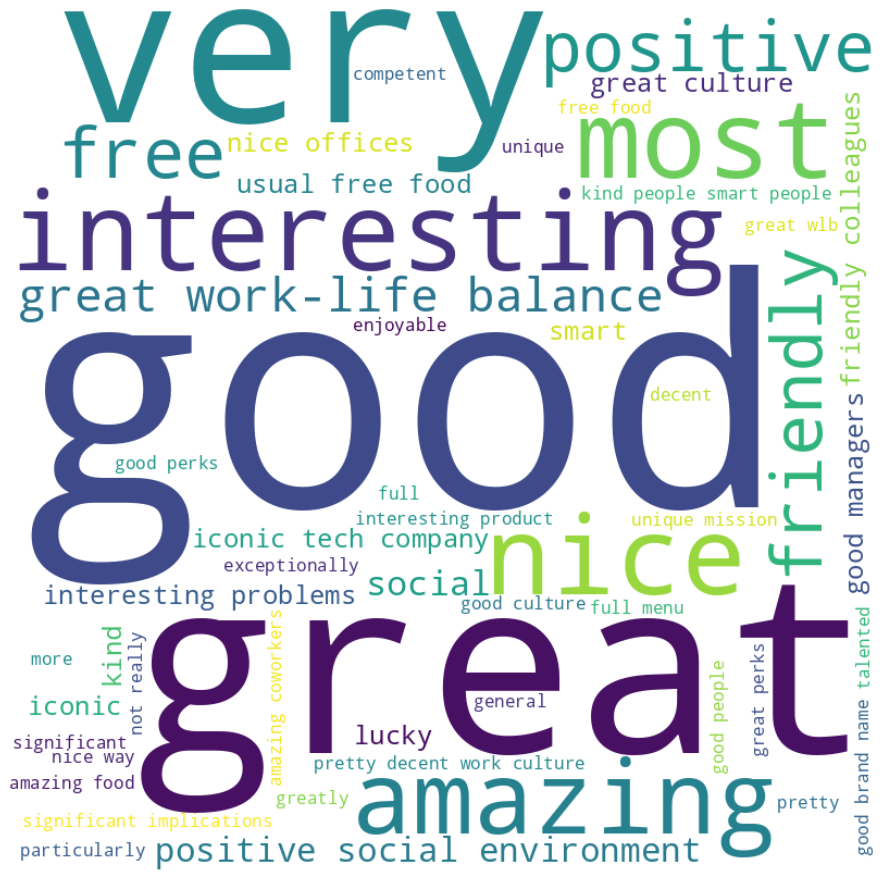

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_pros)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
negative_words = filtered_data["Cons"].apply(get_negative_words)

In [ ]:
flat_list = [word for sublist in negative_words for word in sublist]
from collections import Counter
word_counts = Counter(flat_list)
top_words_cons = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:200])
print(top_words_cons)

{'other': 4, 'bad': 2, 'little': 2, 'previously': 1, 'forced': 1, 'psychotic': 1, 'psychotic behavior': 1, 'stupid': 1, 'stupid ideas': 1, 'bad execution': 1, 'impossible': 1, 'unlikely': 1, 'not subject': 1, 'worse': 1, 'weak': 1, 'weak company moralecontinue reading': 1, 'due': 1, 'cutting': 1, 'difficult': 1, 'subject': 1, 'down': 1, 'less': 1, 'tough': 1, 'few': 1, 'failed': 1, 'waste': 1, 'everyday': 1, 'trouble': 1}


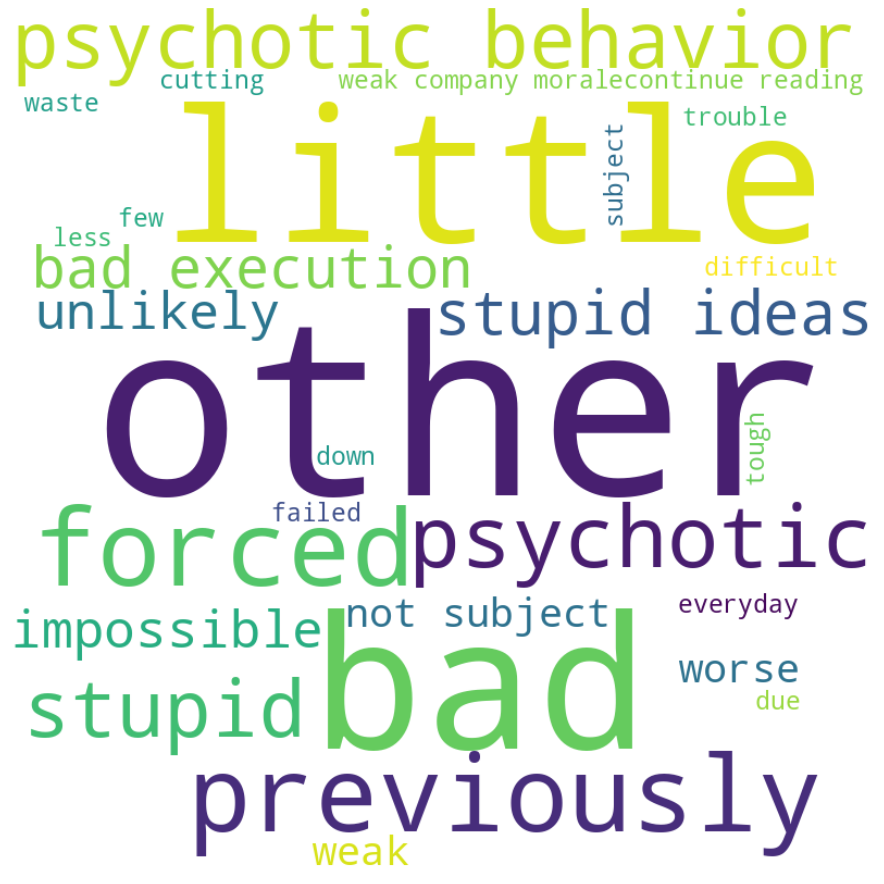

In [ ]:
from wordcloud import WordCloud

# Create a WordCloud object with the specified parameters
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(top_words_cons)

# Display the generated image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()